## Control Complexity of decision tree
    
    post-pruning : ccp_alpha
    pre-pruning : control maxdepth or the minimal number to split node.

In [5]:
import numpy as np
import pandas as pd

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
cancer = load_breast_cancer()

In [11]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 42)

### Full tree

In [13]:
tree = DecisionTreeClassifier(random_state=0)

In [14]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
print("train acc : {:.3f}".format(tree.score(X_train,y_train)))
print("test acc : {:.3f}".format(tree.score(X_test,y_test)))

train acc : 1.000
test acc : 0.937


### Pre-pruning by cotrolling the maxdepth

    By controlling the maxdepth, we may prevent the overfitting of tree.

In [20]:
tree = DecisionTreeClassifier(random_state=0,max_depth=4)

In [21]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [22]:
print("train acc : {:.3f}".format(tree.score(X_train,y_train)))
print("test acc : {:.3f}".format(tree.score(X_test,y_test)))

train acc : 0.988
test acc : 0.951


### Analyzing tree

In [32]:
from sklearn.tree import export_graphviz,plot_tree

In [38]:
export_graphviz(tree,out_file = "tree.dot",class_names=["negative","positive"],feature_names=cancer.feature_names,impurity=False,filled=True)

In [25]:
import graphviz

[Text(192.01764705882354, 195.696, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = positive'),
 Text(108.31764705882354, 152.208, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = positive'),
 Text(59.082352941176474, 108.72, 'radius error <= 1.048\nsamples = 252\nvalue = [4, 248]\nclass = positive'),
 Text(39.38823529411765, 65.232, 'smoothness error <= 0.003\nsamples = 251\nvalue = [3, 248]\nclass = positive'),
 Text(19.694117647058825, 21.744, 'samples = 4\nvalue = [1, 3]\nclass = positive'),
 Text(59.082352941176474, 21.744, 'samples = 247\nvalue = [2, 245]\nclass = positive'),
 Text(78.7764705882353, 65.232, 'samples = 1\nvalue = [1, 0]\nclass = negative'),
 Text(157.5529411764706, 108.72, 'worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = negative'),
 Text(118.16470588235295, 65.232, 'worst smoothness <= 0.179\nsamples = 12\nvalue = [3, 9]\nclass = positive'),
 Text(98.47058823529412, 21.744, 'samples = 10\nvalue = [1, 9]\

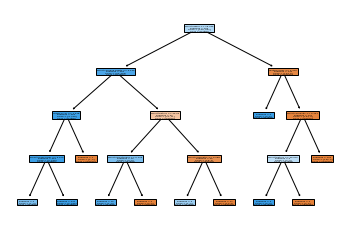

In [41]:
plot_tree(tree,class_names=["negative","positive"],feature_names=cancer.feature_names,impurity=False,filled=True)

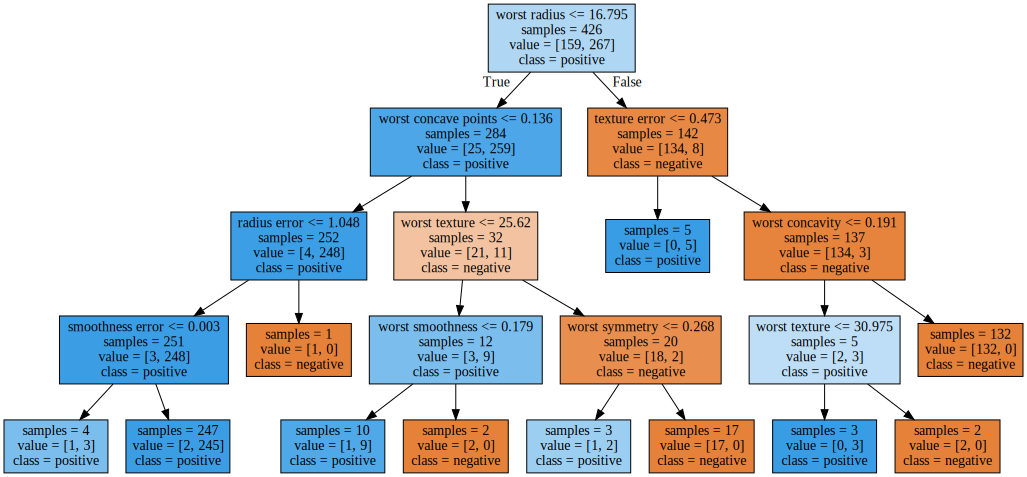

In [40]:
with open("tree.dot") as f :
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

### feature_importances_

In [43]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [44]:
import matplotlib.pyplot as plt

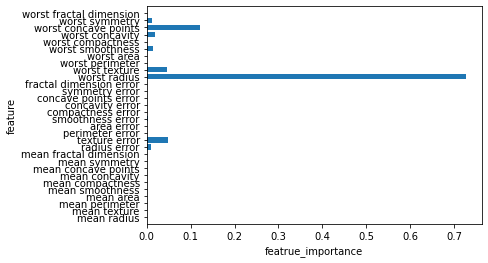

In [47]:
def plot_feature_importances_caner(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("featrue_importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)

plot_feature_importances_caner(tree)

In fact, there is the colicated relation between features and classes.

In [48]:
import mglearn

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Feature importances: [0. 1.]


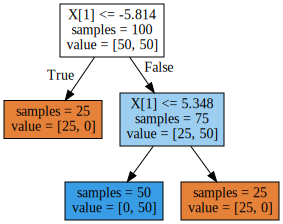

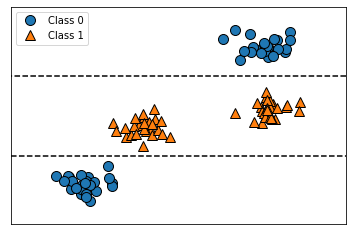

In [49]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### Decision tree regressor

In [55]:
import os
from sklearn.tree import DecisionTreeRegressor

In [51]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

Text(0, 0.5, '가격 ($/Mbyte)')

C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44201 missing from curre

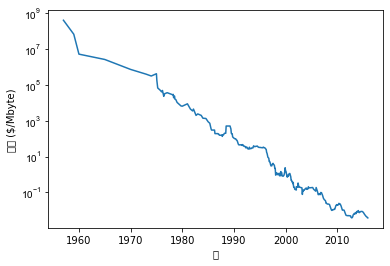

In [54]:
plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")


In [57]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [68]:
data_train.date.to_numpy().shape

(202,)

In [58]:
X_train = data_train.date.to_numpy()[:,np.newaxis]
y_train = np.log(data_train.price)

In [64]:
X_train.shape

(202, 1)

Text(0, 0.5, '가격 ($/Mbyte)')

C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yaeji\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44201 missing from curre

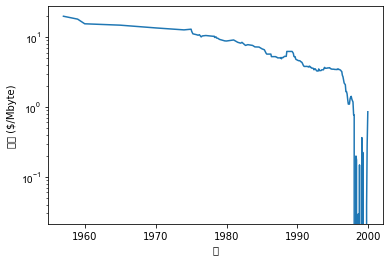

In [62]:
plt.yticks(fontname = "Arial")
plt.semilogy(X_train,y_train)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [82]:
tree = DecisionTreeRegressor().fit(X_train,y_train)

In [83]:
X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)

price_tree = np.exp(pred_tree)

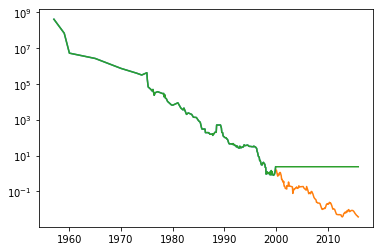

In [84]:
plt.semilogy(data_train.date,data_train.price)
plt.semilogy(data_test.date,data_test.price)

plt.semilogy(ram_prices.date,price_tree)

Predictions of regression tree are bounded between min in train and max in train

### Pros and Cons

    Pros
    - Easy to use 
    - Explainable
    - No nomarlization or standardization
    - Work well in mixed data or different scale data.
    
    Cons
    - Relatively Poor performance
    - can't extrapolate